### DADOS

In [19]:
# libs para manipulação de dados
import pandas as pd
import numpy as np

# libs para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

BASE_MUERTES_COVID = '../data/external/muertes-covid-por-pais.csv'
BASE_POBLACION = '../data/external/poblacion-por-pais.csv'

In [20]:
# Leitura da base
df_muertes = pd.read_csv(
    BASE_MUERTES_COVID,
    sep=',')
df_muertes.columns

Index(['pais', 'fecha inicio', 'fecha fin', 'dias', 'semana',
       'total muertes reportadas', 'total muertes reportadas por covid'],
      dtype='object')

In [21]:
df_muertes = pd.read_csv(
    BASE_MUERTES_COVID,
    sep=',',
    header=0,
    names=['pais', 'fecha_inicio', 'fecha_fin', 'dias', 'semana', 'total_muertes_reportadas', 'total_muertes_reportadas_por_covid'],
    parse_dates=['fecha_inicio', 'fecha_fin']
    )
df_muertes

,pais,fecha_inicio,fecha_fin,dias,semana,total_muertes_reportadas,total_muertes_reportadas_por_covid
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0
...,...,...,...,...,...,...,...
1327,Brazil,2021-05-01,2021-05-31,31,5,178877,59010
1328,Brazil,2021-06-01,2021-06-30,30,6,178844,55275
1329,Brazil,2021-07-01,2021-07-31,31,7,162439,38304
1330,Brazil,2021-08-01,2021-08-31,31,8,149206,24043


### ITEM 1: TABELA

### Média de morte dos últimos 5 anos sem Covid (2015-2019)

In [22]:
# Criando coluna de ano início e ano fim
df_muertes ['ano_inicio'] = pd.DatetimeIndex(df_muertes['fecha_inicio']).year
df_muertes ['ano_fim'] = pd.DatetimeIndex(df_muertes['fecha_fin']).year
df_muertes

,pais,fecha_inicio,fecha_fin,dias,semana,total_muertes_reportadas,total_muertes_reportadas_por_covid,ano_inicio,ano_fim
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0,2014,2015
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0,2015,2015
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0,2015,2015
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0,2015,2015
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0,2015,2015
...,...,...,...,...,...,...,...,...,...
1327,Brazil,2021-05-01,2021-05-31,31,5,178877,59010,2021,2021
1328,Brazil,2021-06-01,2021-06-30,30,6,178844,55275,2021,2021
1329,Brazil,2021-07-01,2021-07-31,31,7,162439,38304,2021,2021
1330,Brazil,2021-08-01,2021-08-31,31,8,149206,24043,2021,2021


In [23]:
df_muertes_agg = df_muertes.groupby(['pais', 'ano_fim'])[[
    'total_muertes_reportadas', 'total_muertes_reportadas_por_covid'
    ]].agg({'total_muertes_reportadas': 'sum', 'total_muertes_reportadas_por_covid': 'sum'}).reset_index()
df_muertes_agg.head(7)

,pais,ano_fim,total_muertes_reportadas,total_muertes_reportadas_por_covid
0,Brazil,2015,1264175,0
1,Brazil,2016,1309774,0
2,Brazil,2017,1312663,0
3,Brazil,2018,1316719,0
4,Brazil,2019,1349802,0
5,Brazil,2020,1581645,194949
6,Brazil,2021,1491943,401800


In [24]:
media_muertes_5anos = df_muertes_agg[(df_muertes_agg['ano_fim'] >= 2015) & (df_muertes_agg['ano_fim'] <= 2019)]
media_muertes_5anos = media_muertes_5anos.groupby('pais').agg({'total_muertes_reportadas': 'mean'}).rename(columns={'total_muertes_reportadas': 'media_muertes_5anos'}).reset_index()
media_muertes_5anos

,pais,media_muertes_5anos
0,Brazil,1310626.6
1,Chile,106306.5
2,Colombia,230407.8
3,Mexico,699383.0
4,Peru,108592.0


In [25]:
df_muertes_agg1 = df_muertes_agg.merge(media_muertes_5anos, how='left', on='pais')
df_muertes_agg1['media_muertes_5anos'] = np.where(df_muertes_agg1['total_muertes_reportadas_por_covid']==0, 0, df_muertes_agg1['media_muertes_5anos'])
df_muertes_agg1

,pais,ano_fim,total_muertes_reportadas,total_muertes_reportadas_por_covid,media_muertes_5anos
0,Brazil,2015,1264175,0,0.0
1,Brazil,2016,1309774,0,0.0
2,Brazil,2017,1312663,0,0.0
3,Brazil,2018,1316719,0,0.0
4,Brazil,2019,1349802,0,0.0
5,Brazil,2020,1581645,194949,1310626.6
6,Brazil,2021,1491943,401800,1310626.6
7,Chile,2016,101733,0,0.0
8,Chile,2017,107687,0,0.0
9,Chile,2018,106458,0,0.0


In [26]:
df_muertes_agg1['exceso_muertes'] = df_muertes_agg1['total_muertes_reportadas'] - df_muertes_agg1['media_muertes_5anos']
df_muertes_agg1

,pais,ano_fim,total_muertes_reportadas,total_muertes_reportadas_por_covid,media_muertes_5anos,exceso_muertes
0,Brazil,2015,1264175,0,0.0,1264175.0
1,Brazil,2016,1309774,0,0.0,1309774.0
2,Brazil,2017,1312663,0,0.0,1312663.0
3,Brazil,2018,1316719,0,0.0,1316719.0
4,Brazil,2019,1349802,0,0.0,1349802.0
5,Brazil,2020,1581645,194949,1310626.6,271018.4
6,Brazil,2021,1491943,401800,1310626.6,181316.4
7,Chile,2016,101733,0,0.0,101733.0
8,Chile,2017,107687,0,0.0,107687.0
9,Chile,2018,106458,0,0.0,106458.0


In [27]:
df_poblacion = pd.read_csv(BASE_POBLACION,
    sep=',',
    header=0,
    names=['pais', 'poblacion'])
df_poblacion

,pais,poblacion
0,Mexico,130262220
1,Peru,33359415
2,Chile,19212362
3,Brazil,213993441
4,Colombia,51265841


In [28]:
df_muertes_agg2 = df_muertes_agg1.merge(df_poblacion, how='left', on='pais')
df_muertes_agg2

,pais,ano_fim,total_muertes_reportadas,total_muertes_reportadas_por_covid,media_muertes_5anos,exceso_muertes,poblacion
0,Brazil,2015,1264175,0,0.0,1264175.0,213993441
1,Brazil,2016,1309774,0,0.0,1309774.0,213993441
2,Brazil,2017,1312663,0,0.0,1312663.0,213993441
3,Brazil,2018,1316719,0,0.0,1316719.0,213993441
4,Brazil,2019,1349802,0,0.0,1349802.0,213993441
5,Brazil,2020,1581645,194949,1310626.6,271018.4,213993441
6,Brazil,2021,1491943,401800,1310626.6,181316.4,213993441
7,Chile,2016,101733,0,0.0,101733.0,19212362
8,Chile,2017,107687,0,0.0,107687.0,19212362
9,Chile,2018,106458,0,0.0,106458.0,19212362


In [29]:
df_muertes_agg2 = df_muertes_agg2.groupby('pais')[['total_muertes_reportadas_por_covid', 'exceso_muertes', 'poblacion']].agg({'total_muertes_reportadas_por_covid': 'sum', 'exceso_muertes': 'sum', 'poblacion': 'mean'}).reset_index()
df_muertes_agg2

,pais,total_muertes_reportadas_por_covid,exceso_muertes,poblacion
0,Brazil,596749,7005467.8,213993441.0
1,Chile,37669,452914.0,19212362.0
2,Colombia,112826,1211644.4,51265841.0
3,Mexico,277814,4028082.0,130262220.0
4,Peru,200430,546520.0,33359415.0


In [30]:
df_muertes_agg2['muertes_covid_por_cada_100.000hab'] = round(df_muertes_agg2['total_muertes_reportadas_por_covid']/df_muertes_agg2['poblacion']*100000, 2)
df_muertes_agg2

,pais,total_muertes_reportadas_por_covid,exceso_muertes,poblacion,muertes_covid_por_cada_100.000hab
0,Brazil,596749,7005467.8,213993441.0,278.86
1,Chile,37669,452914.0,19212362.0,196.07
2,Colombia,112826,1211644.4,51265841.0,220.08
3,Mexico,277814,4028082.0,130262220.0,213.27
4,Peru,200430,546520.0,33359415.0,600.82


In [31]:
df_muertes_agg2['exceso_muertes_por_cada_100.000hab'] = round(df_muertes_agg2['exceso_muertes']/df_muertes_agg2['poblacion']*100000, 2)
df_muertes_agg2

,pais,total_muertes_reportadas_por_covid,exceso_muertes,poblacion,muertes_covid_por_cada_100.000hab,exceso_muertes_por_cada_100.000hab
0,Brazil,596749,7005467.8,213993441.0,278.86,3273.68
1,Chile,37669,452914.0,19212362.0,196.07,2357.41
2,Colombia,112826,1211644.4,51265841.0,220.08,2363.45
3,Mexico,277814,4028082.0,130262220.0,213.27,3092.29
4,Peru,200430,546520.0,33359415.0,600.82,1638.28


In [37]:
df_muertes_agg2['diferencia_entre_cifras'] = df_muertes_agg2['exceso_muertes_por_cada_100.000hab'] - df_muertes_agg2['muertes_covid_por_cada_100.000hab']
df_muertes_agg2

,pais,total_muertes_reportadas_por_covid,exceso_muertes,poblacion,muertes_covid_por_cada_100.000hab,exceso_muertes_por_cada_100.000hab,diferencia_entre_cifras
0,Brazil,596749,7005467.8,213993441.0,278.86,3273.68,2994.82
1,Chile,37669,452914.0,19212362.0,196.07,2357.41,2161.34
2,Colombia,112826,1211644.4,51265841.0,220.08,2363.45,2143.37
3,Mexico,277814,4028082.0,130262220.0,213.27,3092.29,2879.02
4,Peru,200430,546520.0,33359415.0,600.82,1638.28,1037.46


## ITEM 2: GRÁFICO DE BARRAS

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
x = df_muertes_agg2['pais']
y = df_muertes_agg2[['diferencia_entre_cifras', 'exceso_muertes_por_cada_100.000hab']]

<BarContainer object of 5 artists>

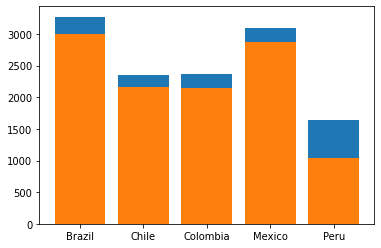

In [46]:
plt.bar(x=x, height=y['exceso_muertes_por_cada_100.000hab'])
plt.bar(x=x, height=y['diferencia_entre_cifras'])


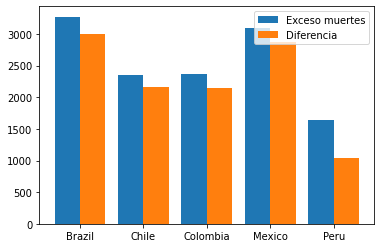

In [47]:
x_axis = np.arange(len(x))

# Multi bar Chart

plt.bar(x_axis -0.2, y['exceso_muertes_por_cada_100.000hab'], width=0.4, label = 'Exceso muertes')
plt.bar(x_axis +0.2, y['diferencia_entre_cifras'], width=0.4, label = 'Diferencia')

# Xticks

plt.xticks(x_axis, x)

# Add legend

plt.legend(loc='upper right')

# Display

plt.show()

### ITEM 3: GRÁFICO DE LINHA SEMANAL

Un gráfico por cada país que muestre el comparativo de la evolución en el tiempo de las muertes reportadas COVID-19 vs. el cálculo de “exceso de muertes” semana a semana, ambos datos por cada 100 mil habitantes.

In [48]:
df_muertes['fecha_inicio_ano_mes'] = df_muertes['fecha_inicio'].dt.year.astype(str) + df_muertes['fecha_inicio'].dt.month.astype(str).str.zfill(2)

In [49]:
df_muertes

,pais,fecha_inicio,fecha_fin,dias,semana,total_muertes_reportadas,total_muertes_reportadas_por_covid,ano_inicio,ano_fim,fecha_inicio_ano_mes
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0,2014,2015,201412
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0,2015,2015,201501
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0,2015,2015,201501
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0,2015,2015,201501
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0,2015,2015,201501
...,...,...,...,...,...,...,...,...,...,...
1327,Brazil,2021-05-01,2021-05-31,31,5,178877,59010,2021,2021,202105
1328,Brazil,2021-06-01,2021-06-30,30,6,178844,55275,2021,2021,202106
1329,Brazil,2021-07-01,2021-07-31,31,7,162439,38304,2021,2021,202107
1330,Brazil,2021-08-01,2021-08-31,31,8,149206,24043,2021,2021,202108


In [52]:
y2

0        15101
1        15449
2        14820
3        14172
4        13628
         ...  
1327    178877
1328    178844
1329    162439
1330    149206
1331    129743
Name: total_muertes_reportadas, Length: 1332, dtype: int64

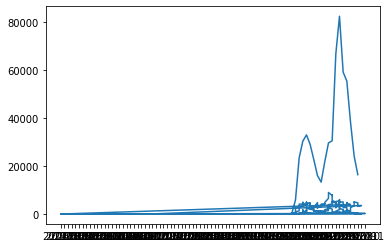

In [53]:
x = df_muertes['fecha_inicio_ano_mes']
y1 = df_muertes['total_muertes_reportadas_por_covid']
y2 = df_muertes['total_muertes_reportadas']

plt.plot(x, y1)
#plt.plot(x, y2)
